* Group Assignment

    #### Name: Kizito Moses
    #### Reg No: 2022/HD07/1971U

    ### Name2: Doreck Nuwasiima
    ### Reg No: 2022/HD07/1970U


# Group Project Assignment:-

You are a lead data scientist on a project regarding healthy, you are provided with a dataset regarding featal health. (Please find the dataset in the data folder given). These are your instructions
1 - Use that dataset to do: EDA, Clean the data
2 - Use mandas Profiling to export a pdf report of your data (explain how the report informs your future decisions)
3 - Apply any needed transformations if possible.
4 - Choose a proper evaluation metric for your project.
5 - Do model spot checking to find the best model for your use.
6 - Build the chosen model
7 - Evaluate bias vs variance on your model and present your results.

Note:
- Please follow instructions!
- You have to explain in detail every step you are executing in your own words, your result will be based on how well you explain what steps you are executing.
- Students are allowed to use public resources off the internet for their research, however students are not allowed to copy and paste code for this assignment (If you are caught, you will fail this assignment, you have been warned: especially chatGpt.)
- This is a graded group assignment any malpractice will lead to losing of points, this assignment contributes a great percentage to your final grade.
- All assignments must be handed in by Close of Business next Wednesday by 6:00PM Date: 29 - May - 2023
- All your assignments will be handed in by means of a pull request to my original repository.
- Please name your pull requests as per previously instructed, you will not get warnings for failing to do this.
- Your work should be saved in the Project Folder (Create your own folder and give the folder your name.)


In [1]:
# Importing required libraries

%matplotlib inline 
import pandas as pd # For the manipulation of tabular data
import numpy as np # For improved numerical calculation
from ydata_profiling import ProfileReport # For exploratory data analysis reporting
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For improved plot outlook
from sklearn.preprocessing import LabelEncoder
# Importing the scaler
from sklearn.preprocessing import StandardScaler

# Importing required models and metrics for the Assignment
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# removing the warnings from the cells.
import warnings
warnings.filterwarnings('ignore')

### Task 1

#### Reading the Data

In [2]:
# Loading the health status data
dfet = pd.read_csv("BigData_Assignment_final_dataset.csv")

print(dfet.shape)


(10000, 61)


In [4]:
dfet.head(4)

PatientID  Age  Gender Sexual_Orientation       Race  Weight  Height   BMI  \
0      33216   72  Female             Others     Others     112     156  46.0   
1      89319   45  Female             Others  Caucasian      40     190  11.1   
2      48170   44    Male         Homosexual    African     112     209  25.6   
3      83430   40    Male       Heterosexual   Hispanic      83     195  21.8   

   Label  Fever  ...  SinusPain  SwollenLymphNodes  MemoryLoss  Dehydration  \
0      1      0  ...          1                  1           0            0   
1      1      1  ...          1                  0           0            1   
2      0      0  ...          1                  1           0            0   
3      1      0  ...          0                  1           1            1   

   IncreasedUrination  DryMouth  TinglingInHandsOrFeet  RedEye  \
0                   1         1                      1       0   
1                   0         1                      1       1   
2                   1         1                      1       0   
3                   0         1                      0       1   

   LossOfConsciousness   Disease  
0                    1   Healthy  
1                    1  Covid-19  
2                    0   Malaria  
3                    0  Diabetes  

[4 rows x 61 columns]

#### Exploratory Data Analysis (EDA)

Here, the dataset will be explored to identify its features, any possible errors or duplications during data entry.

It involves checking out the number of columns, rows, null values, descriptive statistics (data distributions).

We have considered the following order:

- **Data description**

- **Univariate analysis** - Here, we explore each individual feature/ column to gain more insight into its distribution
- **Bivariate analysis** - Here, we explore the relatedness between each two individual features, more like checking their correlation. we mainly considered the relatedness of each feature to the target ( fetal health ).
- **Multivariate analysis** - Here, we explore the relatedness of three or more features of which one is the target (fetal health). This is based on insights obtained from Bivariate analysis.

#### Univariate Analysis

In [5]:
# Displaying the last eight rows of the dataset
dfet.tail(8)

PatientID  Age  Gender Sexual_Orientation       Race  Weight  Height  \
9992      92125   30    Male       Heterosexual      Asian     102     174   
9993      53260   95    Male            Asexual      Asian      95     210   
9994      10451   34  Female           Bisexual   Hispanic      52     153   
9995      19615   30  Female           Bisexual    African      46     145   
9996      84552   74    Male           Bisexual   Hispanic     114     188   
9997      85999   22  Female            Asexual  Caucasian      42     208   
9998      50009   22    Male           Bisexual  Caucasian      84     170   
9999      92568   90  Female         Homosexual      Asian      90     204   

       BMI  Label  Fever  ...  SinusPain  SwollenLymphNodes  MemoryLoss  \
9992  33.7      1      1  ...          0                  1           0   
9993  21.5      0      0  ...          0                  1           1   
9994  22.2      0      0  ...          1                  0           1   
9995  21.9      0      0  ...          0                  0           1   
9996  32.3      0      1  ...          1                  0           0   
9997   9.7      0      1  ...          0                  1           0   
9998  29.1      0      0  ...          0                  0           0   
9999  21.6      1      1  ...          0                  0           1   

      Dehydration  IncreasedUrination  DryMouth  TinglingInHandsOrFeet  \
9992            0                   0         0                      0   
9993            0                   1         0                      1   
9994            0                   0         0                      1   
9995            0                   1         1                      1   
9996            0                   1         0                      0   
9997            1                   1         0                      1   
9998            1                   1         1                      1   
9999            0                   0         0                      0   

      RedEye  LossOfConsciousness   Disease  
9992       1                    0       HIV  
9993       0                    1  Covid-19  
9994       0                    1  Covid-19  
9995       1                    1       HIV  
9996       0                    1       HIV  
9997       0                    0  Diabetes  
9998       1                    0   Malaria  
9999       1                    1  Covid-19  

[8 rows x 61 columns]

In [6]:
# Checking for number presence of null values and dtypes
dfet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PatientID              10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Sexual_Orientation     10000 non-null  object 
 4   Race                   10000 non-null  object 
 5   Weight                 10000 non-null  int64  
 6   Height                 10000 non-null  int64  
 7   BMI                    10000 non-null  float64
 8   Label                  10000 non-null  int64  
 9   Fever                  10000 non-null  int64  
 10  Cough                  10000 non-null  int64  
 11  Fatigue                10000 non-null  int64  
 12  BodyAche               10000 non-null  int64  
 13  LossOfTaste            10000 non-null  int64  
 14  Sweating               10000 non-null  int64  
 15  Hea

In [6]:
# Displaying the data's descriptive statistics
dfet.describe().round(2)

PatientID       Age    Weight    Height       BMI    Label    Fever  \
count   10000.00  10000.00  10000.00  10000.00  10000.00  10000.0  10000.0   
mean    49903.77     57.87     79.70    174.87     27.16      0.5      0.5   
std     28948.68     24.67     23.35     20.34     10.37      0.5      0.5   
min         5.00     15.00     40.00    140.00      9.10      0.0      0.0   
25%     24647.50     37.00     59.00    157.00     19.20      0.0      0.0   
50%     49478.50     58.00     80.00    175.00     25.70      0.0      1.0   
75%     75294.00     79.00    100.00    192.00     33.60      1.0      1.0   
max     99991.00    100.00    120.00    210.00     61.20      1.0      1.0   

         Cough   Fatigue  BodyAche  ...  RunnyNose  SinusPain  \
count  10000.0  10000.00  10000.00  ...    10000.0    10000.0   
mean       0.5      0.49      0.49  ...        0.5        0.5   
std        0.5      0.50      0.50  ...        0.5        0.5   
min        0.0      0.00      0.00  ...        0.0        0.0   
25%        0.0      0.00      0.00  ...        0.0        0.0   
50%        0.0      0.00      0.00  ...        1.0        1.0   
75%        1.0      1.00      1.00  ...        1.0        1.0   
max        1.0      1.00      1.00  ...        1.0        1.0   

       SwollenLymphNodes  MemoryLoss  Dehydration  IncreasedUrination  \
count            10000.0     10000.0     10000.00             10000.0   
mean                 0.5         0.5         0.49                 0.5   
std                  0.5         0.5         0.50                 0.5   
min                  0.0         0.0         0.00                 0.0   
25%                  0.0         0.0         0.00                 0.0   
50%                  0.0         1.0         0.00                 1.0   
75%                  1.0         1.0         1.00                 1.0   
max                  1.0         1.0         1.00                 1.0   

       DryMouth  TinglingInHandsOrFeet   RedEye  LossOfConsciousness  
count   10000.0                10000.0  10000.0             10000.00  
mean        0.5                    0.5      0.5                 0.49  
std         0.5                    0.5      0.5                 0.50  
min         0.0                    0.0      0.0                 0.00  
25%         0.0                    0.0      0.0                 0.00  
50%         0.0                    1.0      0.0                 0.00  
75%         1.0                    1.0      1.0                 1.00  
max         1.0                    1.0      1.0                 1.00  

[8 rows x 57 columns]

## Explanation of the descriptive output.

* The descriptive output bove, indicates that there are 1000 entries in of the 22 columns (variables/ features). 
* The youngest participant had 15 years and oldest 100, with an average age of 58.
* The variable Age, Weight, Height and BMI are all quantitative variables and the 16 variables a coded categorical ones and the output (Disease) variable is qualitatitive)

In [7]:
# Checking for duplicates
dfet[dfet.duplicated()]

Empty DataFrame
Columns: [PatientID, Age, Gender, Sexual_Orientation, Race, Weight, Height, BMI, Label, Fever, Cough, Fatigue, BodyAche, LossOfTaste, Sweating, Headache, Nausea, Diarrhea, LossOfAppetite, ShortnessOfBreath, ChestPain, FrequentUrination, ExcessiveThirst, WeightLoss, BlurredVision, Chills, SoreThroat, Confusion, Dizziness, Rash, JointPain, StiffNeck, Seizures, SensitivityToLight, MoodSwings, NeckPain, MuscleWeakness, LossOfSmell, Insomnia, HearingLoss, EarAche, NightSweats, SkinRash, Wheezing, YellowSkin, PinkEye, EyePain, IncreasedAppetite, DecreasedAppetite, NasalCongestion, RunnyNose, SinusPain, SwollenLymphNodes, MemoryLoss, Dehydration, IncreasedUrination, DryMouth, TinglingInHandsOrFeet, RedEye, LossOfConsciousness, Disease]
Index: []

[0 rows x 61 columns]

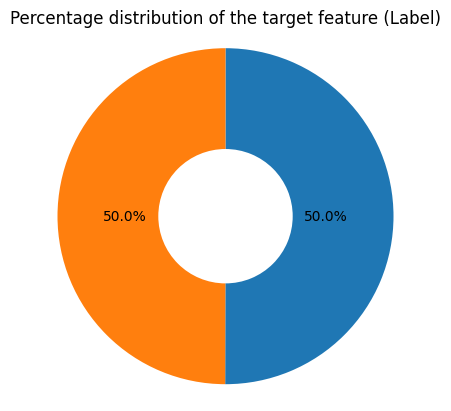

In [11]:
# Proportion of fetal health classes
plt.pie(dfet['Label'].value_counts(), startangle = 90, counterclock = False, autopct='%1.1f%%', wedgeprops = {'width' : 0.6});
plt.axis('square')
#plt.legend()
plt.title("Percentage distribution of the target feature (Label)");

In [12]:
#decoded_values = [Label[int(code)] for code in Label]
#decoded_values

#### Multivariate Analysis

* This will help us understand the association of the different variables with the target output for this dataset.
* The code below is used to eliminate the first patientID variable is we thought it not important in this analysis

In [13]:
dfetimp = dfet.iloc[:, 1:]
dfetimp.head()

Age  Gender Sexual_Orientation       Race  Weight  Height   BMI  Label  \
0   72  Female             Others     Others     112     156  46.0      1   
1   45  Female             Others  Caucasian      40     190  11.1      1   
2   44    Male         Homosexual    African     112     209  25.6      0   
3   40    Male       Heterosexual   Hispanic      83     195  21.8      1   
4   81    Male            Asexual    African      83     144  40.0      0   

   Fever  Cough  ...  SinusPain  SwollenLymphNodes  MemoryLoss  Dehydration  \
0      0      0  ...          1                  1           0            0   
1      1      0  ...          1                  0           0            1   
2      0      1  ...          1                  1           0            0   
3      0      0  ...          0                  1           1            1   
4      1      0  ...          0                  1           1            0   

   IncreasedUrination  DryMouth  TinglingInHandsOrFeet  RedEye  \
0                   1         1                      1       0   
1                   0         1                      1       1   
2                   1         1                      1       0   
3                   0         1                      0       1   
4                   0         0                      0       0   

   LossOfConsciousness   Disease  
0                    1   Healthy  
1                    1  Covid-19  
2                    0   Malaria  
3                    0  Diabetes  
4                    1  Covid-19  

[5 rows x 60 columns]

In [14]:
import pandas as pd
# Correlation between the features
#plt.figure(figsize = [15, 15])
# Set the display options
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
#sns.heatmap(dfetimp.corr(method = 'pearson'), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
#plt.title("Correlation between each pair of features in the health data", fontsize = 20);
correlation_matrix = dfetimp.corr()
correlation_matrix_styled = correlation_matrix.style.set_table_styles([{'selector': 'th',
                                                                       'props': [('font-size', '14pt')]},
                                                                      {'selector': 'td',
                                                                       'props': [('font-size', '12pt')]}])
print(correlation_matrix)

                        Age  Weight  Height   BMI  Label  Fever  Cough  \
Age                    1.00    0.00    0.01 -0.00  -0.01  -0.01  -0.00   
Weight                 0.00    1.00    0.00  0.76  -0.01  -0.00  -0.00   
Height                 0.01    0.00    1.00 -0.61   0.00   0.01   0.00   
BMI                   -0.00    0.76   -0.61  1.00  -0.01  -0.00  -0.00   
Label                 -0.01   -0.01    0.00 -0.01   1.00  -0.01  -0.01   
Fever                 -0.01   -0.00    0.01 -0.00  -0.01   1.00   0.00   
Cough                 -0.00   -0.00    0.00 -0.00  -0.01   0.00   1.00   
Fatigue                0.00    0.02    0.01  0.01   0.00  -0.00   0.00   
BodyAche              -0.01   -0.00    0.01 -0.01   0.02   0.00   0.03   
LossOfTaste            0.01   -0.01   -0.01 -0.00   0.01   0.01  -0.01   
Sweating               0.01   -0.01    0.00 -0.01   0.00  -0.01   0.00   
Headache               0.00   -0.03   -0.01 -0.02   0.00  -0.00   0.02   
Nausea                 0.01   -0.01   

Based on the above correlation, the features with higher absolute correlation to fetal health were plotted against the target

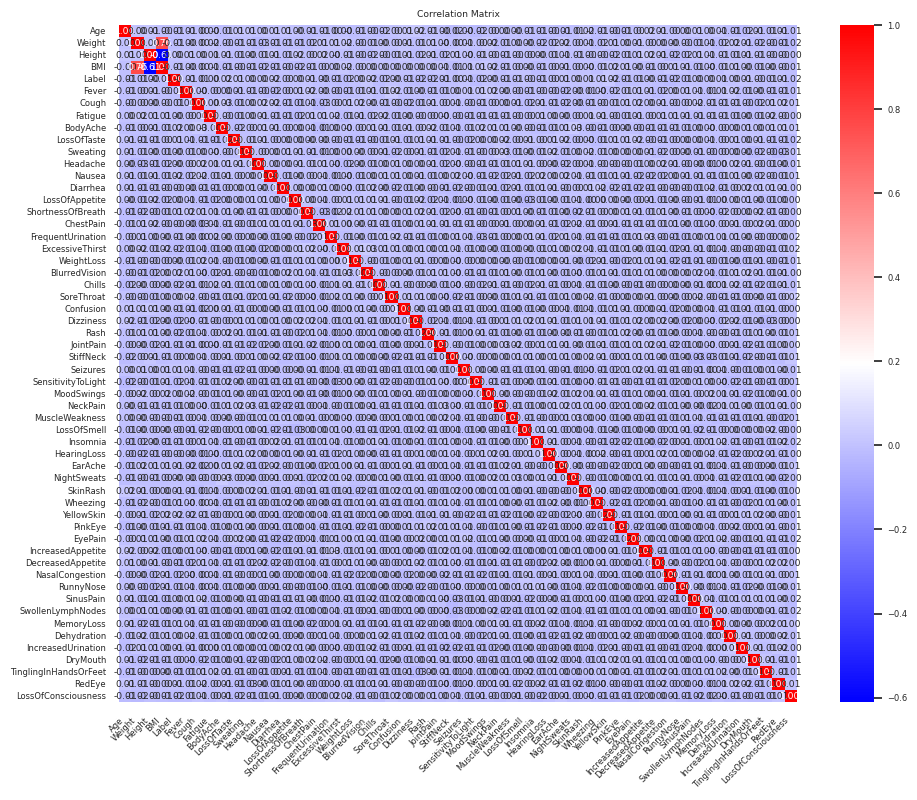

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the correlation matrix and stored it as 'correlation_matrix'

# Create a heatmap of the correlation matrix using seaborn
sns.set(font_scale=0.55)  # Adjust the font scale as needed
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Customize the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="bwr", cbar=True, square=True)
plt.title("Correlation Matrix")

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent cutoff of labels
plt.tight_layout()
plt.savefig('moz_out.pdf')
plt.show()


### Discussions

* The correlation matrix gave a hit but did not provide clear insight about the dataset.
* we decided to dig deeper to understand the availability of outliers in the different cateries and therefore, a general picture.


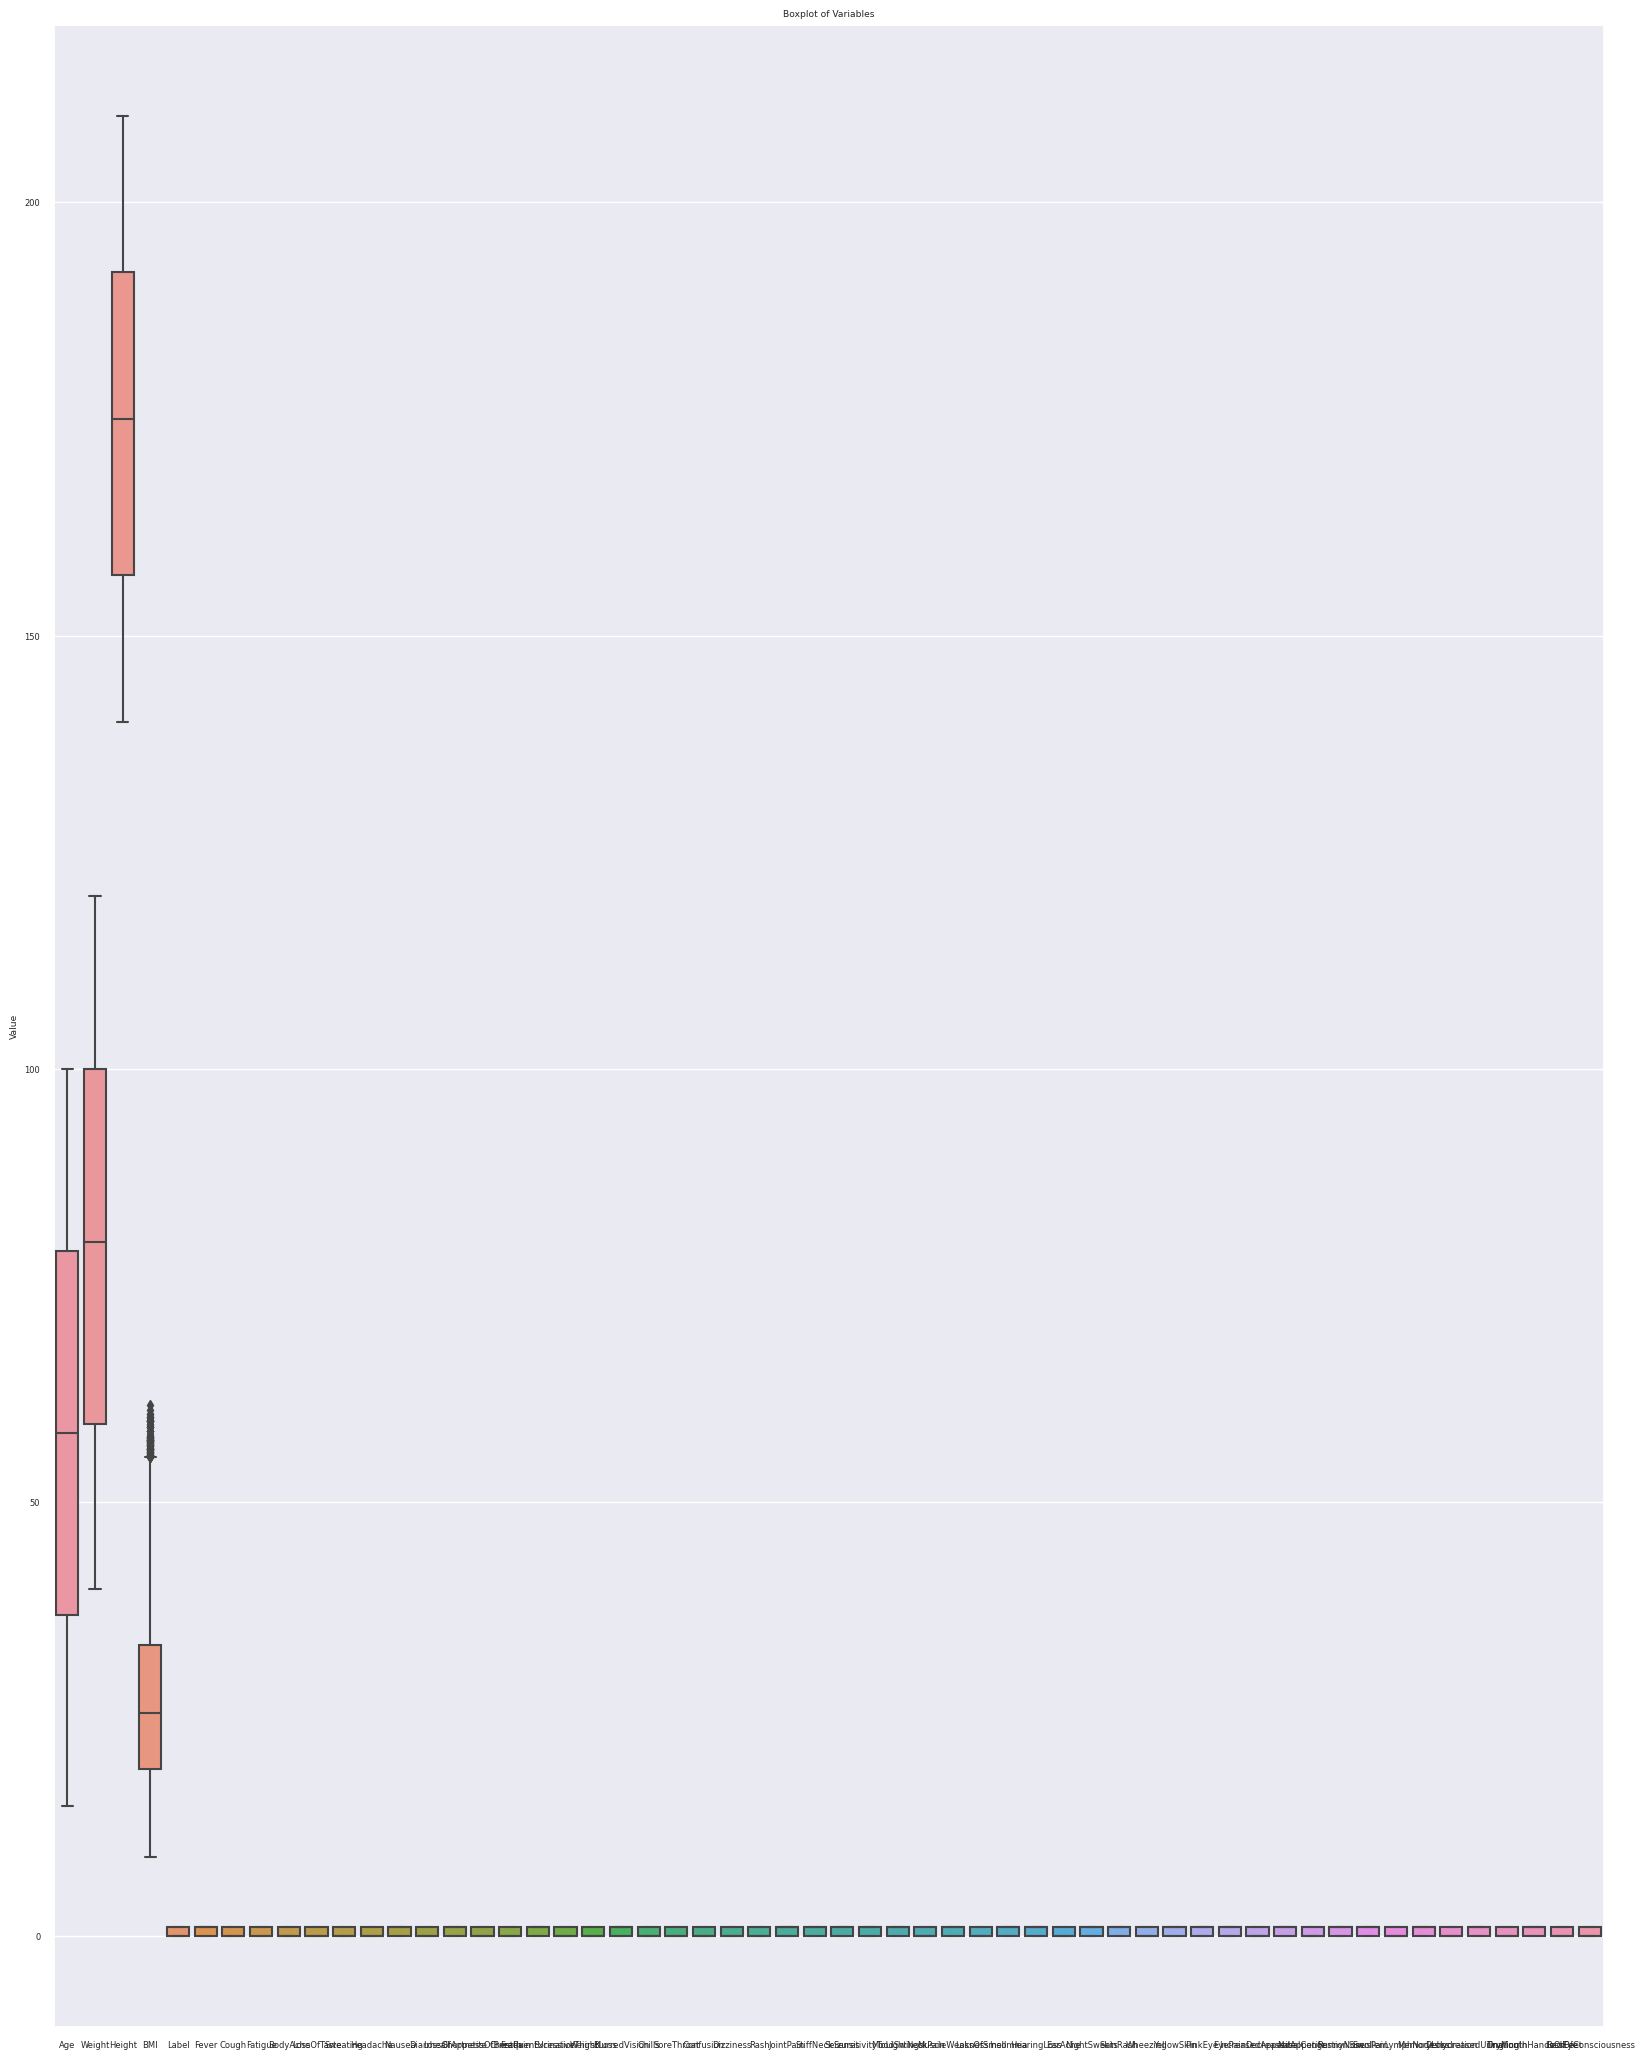

In [13]:
# plotting the distributions of the features on the same graph

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create boxplots for each column using seaborn
plt.figure(figsize=(20, 26))  # Adjust the figure size as needed

# Plot boxplots using seaborn
sns.boxplot(data=dfetimp)

plt.title("Boxplot of Variables")
plt.ylabel("Value")

plt.show()


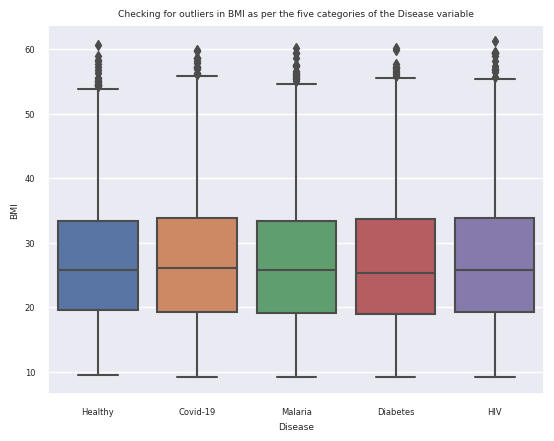

In [13]:
sns.boxplot(data = dfetimp, x = 'Disease', y = 'BMI')
plt.title("Checking for outliers in BMI as per the five categories of the Disease variable");

* Generaly the dataset has no outstanding outleirs, however some quantitative variables like Body mass index (BDM) showed some outliers in the disease categories.
* The few existing outleirs in various categories are going to be removed so that our model is relable informative to the decision makers.

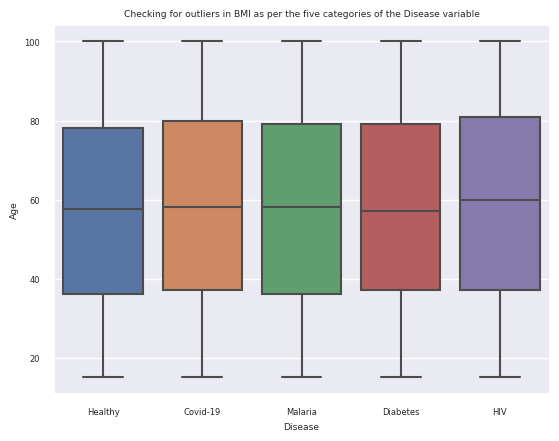

In [14]:
sns.boxplot(data = dfetimp, x = 'Disease', y = 'Age')
plt.title("Checking for outliers in BMI as per the five categories of the Disease variable");

#### Multivariate Analysis

#### Data Cleaning

In [15]:
# Displaying the unique values in the disease feature
dfetimp.Label.unique()

array([1, 0])

#### Task 1 Results

**Data Description**
- There are 10000 data rows each with 61 features.
- There are no null values.
- Whereas there are more features with **zeros** (0.0), this is a normal record value for the features in question, hence no need for extra data imputation.

**Univariate Analysis**
- The various features appear to have different value ranges.
- On visualising the target feature (Label), we observed that the dataset is nearly well balanced with 50% for each of the values in the target feature.
**Bivariate Analysis**
- The following features were found to be relatively more correlated to the target than the rest:
    - BMI
    - Age
    - Weight
    The features were then studied in relation to the target using violin and box plots to check the existance of outliers.
    - A number of variables were found to be normally distributed for example Age.
    
**Multivariate Analysis**
- The identified correlated features were then observed in pairs in relation to the target feature as the third entity.

**Data Cleaning** </br>
  * Since the dataset looked clean, there was no indeed to remove any enteries beside different outliers that were removed to improve the efficiency of the developed model.
  * The patientID variable were removed from the analysis and it was found to be unncessary in support of the model.

### Task 2

#### Pandas Profiling </br>
As the pandas profiling package was deprecated, its replacement, the `ydata_profiling` was used.

To generate the report, the `ProfileReport` method of the ydata_profiling package was used.

To export the report, an html version was saved as pdf is not supported by the package.

The report was also displayed in the notebook.

In [17]:
# Creating the pandas_profiling report for the Health Data named profile
profile = ProfileReport(dfetimp, title="Participants' Health Data Pandas Profiling Report", explorative = True)

In [18]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# As the pdf export is not supported, the pandas_profiling report will be saved as an html
profile.to_file("Participants_Health_Data_report_Group_project_Moses_and_Doreck.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Task 2 Result </br>
Report saved as html.

Issues
- The data is balanced and therefore there is no need to address the imbalance aspect.
- Quantitative variables need to be standardised as some algorithms prefer working with small values

- There are 16 categorical variables.
- Based on the target feature (Disease), the data is balanced as explained earlier.

Information for future decision
- The different feature scales will require standardisation for better machine learning algorithm training.
- The duplicate rows may need removal, however on observation, I chose not to drop them for reasons given in `Task 1`.
- The categorical features were converted to `Categorical variables`.
- During splitting of the data during training, there will be need to `stratify` the splits so that each `target feature value` is well represented.
- There may be need to create `synthetic data` to balance the data or `sample the data` in a way that all target feature values are equally represented.

### Task 3

#### Applying Transformations

As some algorithms like `Support Vector Machines (SVMs)` and `neural networks` are very sensitive to the scaling of the data, the features of the dataset were transformed using the `StandardScaler` package of sci-kit learn.

The StandardScaler in scikit-learn ensures that for each feature the mean is 0 and the variance is 1; but does not ensure any specific minimum and maximum values for the features.

As this scaler may be affected by outliers, one may consider using the `RobustScaler` of sci-kit learn.

#### Scaling the data

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical variable
dfetimp['Gender'] = label_encoder.fit_transform(dfetimp['Gender'])
dfetimp['Sexual_Orientation'] = label_encoder.fit_transform(dfetimp['Sexual_Orientation'])
dfetimp['Race'] = label_encoder.fit_transform(dfetimp['Race'])
dfetimp['Disease'] = label_encoder.fit_transform(dfetimp['Disease'])

# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the quantitative variable
dfetimp['Weight'] = scaler.fit_transform(dfetimp[['Weight']])
dfetimp['Height'] = scaler.fit_transform(dfetimp[['Height']])
dfetimp['BMI'] = scaler.fit_transform(dfetimp[['BMI']])
dfetimp['Age'] = scaler.fit_transform(dfetimp[['Age']])

dfetimp.head()

Age  Gender  Sexual_Orientation  Race  Weight  Height   BMI  Label  Fever  \
0  0.57       0                   4     4    1.38   -0.93  1.82      1      0   
1 -0.52       0                   4     2   -1.70    0.74 -1.55      1      1   
2 -0.56       1                   3     0    1.38    1.68 -0.15      0      0   
3 -0.72       1                   2     3    0.14    0.99 -0.52      1      0   
4  0.94       1                   0     0    0.14   -1.52  1.24      0      1   

   Cough  ...  SinusPain  SwollenLymphNodes  MemoryLoss  Dehydration  \
0      0  ...          1                  1           0            0   
1      0  ...          1                  0           0            1   
2      1  ...          1                  1           0            0   
3      0  ...          0                  1           1            1   
4      0  ...          0                  1           1            0   

   IncreasedUrination  DryMouth  TinglingInHandsOrFeet  RedEye  \
0                   1         1                      1       0   
1                   0         1                      1       1   
2                   1         1                      1       0   
3                   0         1                      0       1   
4                   0         0                      0       0   

   LossOfConsciousness  Disease  
0                    1        3  
1                    1        0  
2                    0        4  
3                    0        1  
4                    1        0  

[5 rows x 60 columns]

In [20]:
# Initialising the scaler
scaler = StandardScaler()


# Separating the target (Label) feature from the other features. y - target, X - other features
dfetimpX = dfetimp.drop(['Label'], axis = 1)
y = dfetimp['Label']

dfetimpX.head()

Age  Gender Sexual_Orientation       Race  Weight  Height   BMI  Fever  \
0   72  Female             Others     Others     112     156 46.00      0   
1   45  Female             Others  Caucasian      40     190 11.10      1   
2   44    Male         Homosexual    African     112     209 25.60      0   
3   40    Male       Heterosexual   Hispanic      83     195 21.80      0   
4   81    Male            Asexual    African      83     144 40.00      1   

   Cough  Fatigue  ...  SinusPain  SwollenLymphNodes  MemoryLoss  Dehydration  \
0      0        0  ...          1                  1           0            0   
1      0        1  ...          1                  0           0            1   
2      1        0  ...          1                  1           0            0   
3      0        1  ...          0                  1           1            1   
4      0        0  ...          0                  1           1            0   

   IncreasedUrination  DryMouth  TinglingInHandsOrFeet  RedEye  \
0                   1         1                      1       0   
1                   0         1                      1       1   
2                   1         1                      1       0   
3                   0         1                      0       1   
4                   0         0                      0       0   

   LossOfConsciousness   Disease  
0                    1   Healthy  
1                    1  Covid-19  
2                    0   Malaria  
3                    0  Diabetes  
4                    1  Covid-19  

[5 rows x 59 columns]

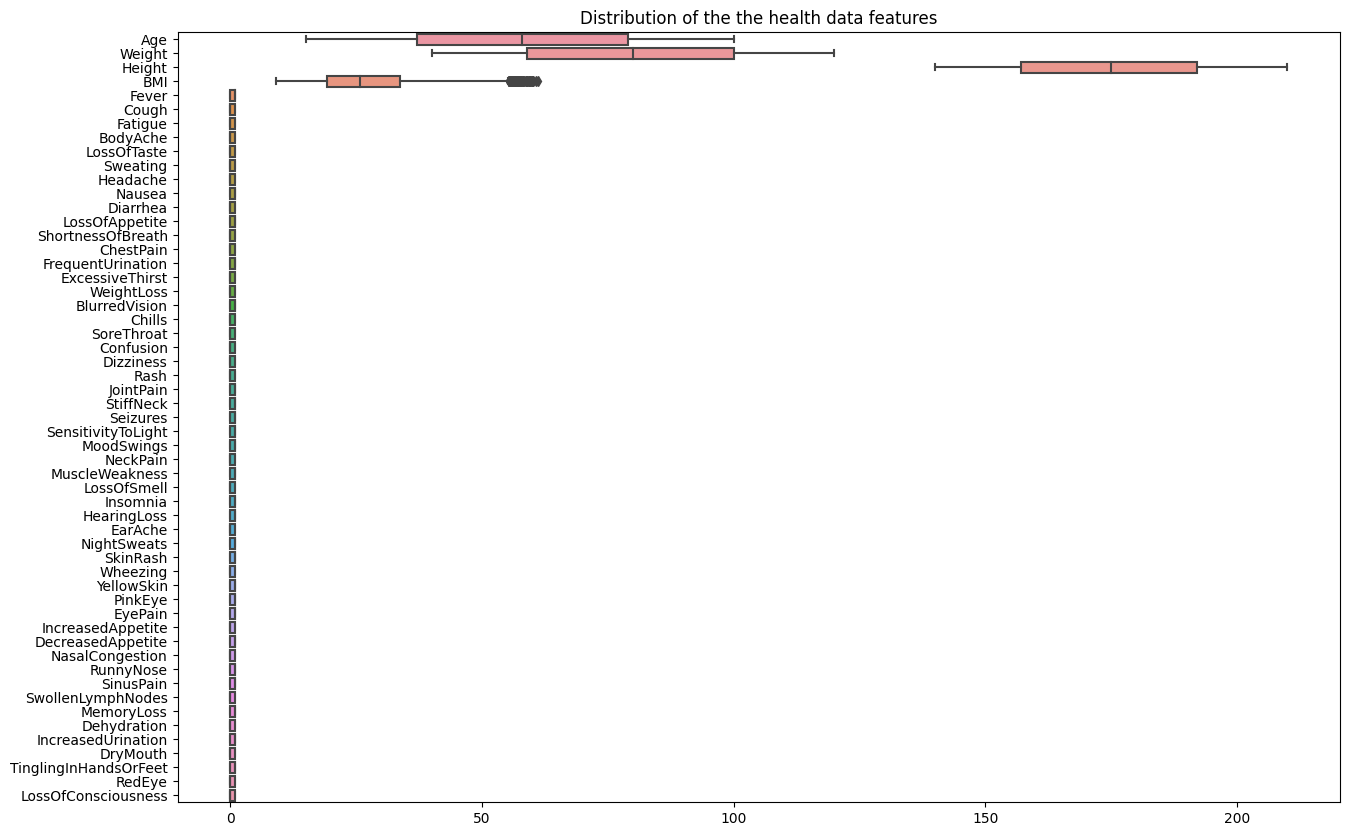

In [21]:
# Plotting the scaled features
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = dfetimpX, orient = 'h')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = list(dfetimp.columns[:-1])
#ax.set_yticklabels(labels)
plt.title("Distribution of the the health data features");

In [22]:
import pandas as pd
from scipy.stats import zscore

# find ways of removing outliers from the BMI variable that are clearly indicated in the visual above


#### Task 3 Result

The health status data features were scaled using the `StandardScaler`.

### Task 4

#### Proper evaluation metric

As the problem at hand is a `classification` problem with `multiple` yet `nearly balanced classes`, the `accurancy` metric is a good one for evaluating the machine learning models. Hoever, other metrics such as recall, precission, and f1score will be employed. 
We already know that, the `f1-score` is given by `2*(Precision*Recall)/(Precision+Recall)`, recall is given by  ` True Positives / (True Positives + False Negatives)`.

Given that the problem involves health decisions that may lead to a life or death interface, using the `confusion matrix`, `classification report (Precision, Recall, f1-score)` may be employed to tune the models to the desired parameters.

For this case, it may be worse to identify the participant's health status as HIV positive compared to identifying him as healthy one hence a need for higher precision and higher recall for the classes.

Still the model will have to be tuned based on the business model and objectives of the problem solver.

### Task 5

**Model Spot-checking**

The following classifiers have been used in the model spot-checking
- Dummy Classifier - Included to check for accuracy given only most frequent class is always predicted as target. Taken as lower baseline classifier.
- Logistic Regression
- Naive Bayes
- K-Nearest Neighbours
- Support Vector Machines - Support Vector Classifier
- Decision Trees
- Ensemble classifiers (Random Forests, Gradient Boosting Classifier and AdaBoostClassifier)

The chosen evaluation metric was `accurancy`. However, other metrics `precision`, `recall`, `F1score` would be also employed to do model spot checking.

The **`_weighted`** versions of the metrics would not be applied since our target variable`Disease` in the data is nearly balanced. 

The `StratifiedKFold` would be used to cater for `cross validation` to ensure each `split` contains equivalent proportions of the different `classes` in the data.

The `DummyClassifier` will be used to set a `baseline score` given one choses the target value at random or selects the most frequent class.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X_trainout, X_testout, y_trainout,y_testout = train_test_split(dfetimpX,y,test_size=0.2,random_state=40)

# Now am using the split dataset below

#A quick model selection process
#pipelines of models( it is short was to fit and pred)



pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

pipeline_kn = Pipeline([('kn_classifier', KNeighborsClassifier(n_neighbors=5))])

pipeline_lda = Pipeline([('lda', LinearDiscriminantAnalysis())])

#pipeline_nn = Pipeline(['nn_classifier',Neural Networks()])
#nn = MLPClassifier(hidden_layer_sizes=(50,25), activation='relu', solver='adam', random_state=42)
#pipeline_nn = Pipeline([('scaler', StandardScaler()), ('nn_classifier', nn)])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc, pipeline_kn, pipeline_lda]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'LinearDiscriminantAnalysis', 
             1: 'Decision Tree', 
             2: 'RandomForest', 
             3: "SVC", 
             4: "KNeighborsClassifier", 
             5: "Logistic Regression", 
            }

# Identify the indices of categorical columns
categorical_columns = ['Gender', 'Sexual_Orientation','Race','Fever','Cough','Fatigue','BodyAche',
                       'LossOfTaste','Sweating','Disease','LossOfConsciousness','RedEye','TinglingInHandsOrFeet'
                      ,'DryMouth','IncreasedUrination','Dehydration','MemoryLoss','SwollenLymphNodes','SinusPain'
                      ,'RunnyNose','NasalCongestion','DecreasedAppetite','IncreasedAppetite','EyePain'
                      ,'PinkEye','YellowSkin','Wheezing','SkinRash','NightSweats','EarAche','HearingLoss',
                      'Insomnia','LossOfSmell','MuscleWeakness','NeckPain','MoodSwings','SensitivityToLight',
                      'Seizures','StiffNeck','JointPain','Rash','Dizziness','SoreThroat','Chills',
                      'BlurredVision','WeightLoss','ExcessiveThirst','ExcessiveThirst','FrequentUrination',
                      'ChestPain','ShortnessOfBreath','LossOfAppetite','Diarrhea','Nausea','Headache']

# Identifying the indices of numerical columns 
numerical_columns = ['Age', 'Weight','Height','BMI'] 

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),  # Pass numerical columns as they are
        ('cat', OneHotEncoder(), categorical_columns)  # Apply one-hot encoding to categorical columns
    ])

# Fit and transform the feature dataset using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_trainout)
X_test_preprocessed = preprocessor.transform(X_testout)

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_preprocessed, y_trainout)

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train_preprocessed, y_trainout, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f" % (pipe_dict[i], cv_score.mean()))


LinearDiscriminantAnalysis: 0.499125
Decision Tree: 0.496250
RandomForest: 0.494500
SVC: 0.499500
KNeighborsClassifier: 0.487500
Logistic Regression: 0.499625


#### Task 5 Result
Based on the results above, the ensemble methods performed better than the rest in terms of `accurancy`, the metric I chose. The ML algrithms doing better than others included Linear Discrinant Analysis at 50%, Random Forest with 49.4%, Decision Tree at 50%, SVC at 50%, and KneighborsClassifier at 48.8% and Logistic regression with 50%, despite their perfornce being slightly better, the performance is still low and therefore requires improvment. 


**To Do**
- Improving the classifiers particilary of the 4 better performing algorithms above and examining other evaluation metrics like F1 score, recall among others.